In [1]:
import numpy as np
import act.io.armfiles
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import netCDF4
import pyart
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy
from matplotlib.dates import DateFormatter


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
from pyart.testing import get_test_data
import fsspec
from metpy.plots import USCOUNTIES
import warnings
warnings.filterwarnings("ignore")
import glob
import os

In [3]:
import siphon
from siphon.catalog import TDSCatalog
import xarray as xr
from xarray.backends import NetCDF4DataStore
from datetime import datetime
import sys
import cmweather

In [4]:
# Function used to make sure there are not any times without any data
def catch_bad_file(cds):
    try:
        return cds.remote_access(use_xarray=True)
    except:
        print("Exception: ", sys.exc_info()[0])

In [5]:
# Accessing the Thredds server
cat_url = 'https://thredds.crocus-urban.org/thredds/catalog/neiu-mrrpro-a1/catalog.html'
cat = TDSCatalog(cat_url)
print(list(cat.datasets.keys()))

['latest.xml', 'crocus-neiu-mrrpro-a1-20230601.020000.nc', 'crocus-neiu-mrrpro-a1-20230601.040000.nc', 'crocus-neiu-mrrpro-a1-20230601.060000.nc', 'crocus-neiu-mrrpro-a1-20230601.090000.nc', 'crocus-neiu-mrrpro-a1-20230601.100000.nc', 'crocus-neiu-mrrpro-a1-20230601.120000.nc', 'crocus-neiu-mrrpro-a1-20230601.140000.nc', 'crocus-neiu-mrrpro-a1-20230601.160000.nc', 'crocus-neiu-mrrpro-a1-20230601.190000.nc', 'crocus-neiu-mrrpro-a1-20230601.210000.nc', 'crocus-neiu-mrrpro-a1-20230601.230000.nc', 'crocus-neiu-mrrpro-a1-20230602.020000.nc', 'crocus-neiu-mrrpro-a1-20230602.040000.nc', 'crocus-neiu-mrrpro-a1-20230602.060000.nc', 'crocus-neiu-mrrpro-a1-20230602.090000.nc', 'crocus-neiu-mrrpro-a1-20230602.100000.nc', 'crocus-neiu-mrrpro-a1-20230602.120000.nc', 'crocus-neiu-mrrpro-a1-20230602.140000.nc', 'crocus-neiu-mrrpro-a1-20230602.180000.nc', 'crocus-neiu-mrrpro-a1-20230602.190000.nc', 'crocus-neiu-mrrpro-a1-20230602.230000.nc', 'crocus-neiu-mrrpro-a1-20230603.020000.nc', 'crocus-neiu-mrrp

In [ ]:
# Testing if all set up right

In [6]:
# list comprehension for files only doing 7 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[1:7]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [7]:
dsets

[<xarray.Dataset>
 Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                              spectrum_n_samples: 32)
 Coordinates:
   * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
   * time                    (time) datetime64[ns] 2023-06-01T02:00:00.0011051...
     elevation               (time) float32 ...
     azimuth                 (time) float32 ...
 Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
 Data variables: (12/31)
     volume_number           int32 ...
     time_coverage_start     |S128 ...
     time_coverage_end       |S128 ...
     time_reference          |S128 ...
     instrument_type         |S128 ...
     transfer_function       (range) float64 ...
     ...                      ...
     ML                      (time, range) float64 ...
     SNR                     (time, range) float32 ...
     index_spectra           (time, range) float64 ...
     spectrum_raw            (time, n

In [8]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230601.020000.nc', 'crocus-neiu-mrrpro-a1-20230601.040000.nc', 'crocus-neiu-mrrpro-a1-20230601.060000.nc', 'crocus-neiu-mrrpro-a1-20230601.090000.nc', 'crocus-neiu-mrrpro-a1-20230601.100000.nc', 'crocus-neiu-mrrpro-a1-20230601.120000.nc', 'crocus-neiu-mrrpro-a1-20230601.140000.nc', 'crocus-neiu-mrrpro-a1-20230601.160000.nc', 'crocus-neiu-mrrpro-a1-20230601.190000.nc', 'crocus-neiu-mrrpro-a1-20230601.210000.nc', 'crocus-neiu-mrrpro-a1-20230601.230000.nc', 'crocus-neiu-mrrpro-a1-20230602.020000.nc', 'crocus-neiu-mrrpro-a1-20230602.040000.nc', 'crocus-neiu-mrrpro-a1-20230602.060000.nc', 'crocus-neiu-mrrpro-a1-20230602.090000.nc', 'crocus-neiu-mrrpro-a1-20230602.100000.nc', 'crocus-neiu-mrrpro-a1-20230602.120000.nc', 'crocus-neiu-mrrpro-a1-20230602.140000.nc', 'crocus-neiu-mrrpro-a1-20230602.180000.nc', 'crocus-neiu-mrrpro-a1-20230602.190000.nc', 'crocus-neiu-mrrpro-a1-20230602.230000.nc', 'crocus-neiu-mrrpro-a1-20230603.020000.nc', 'crocus-neiu-mrrp

In [9]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2160, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-01T02:00:00.001105152 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

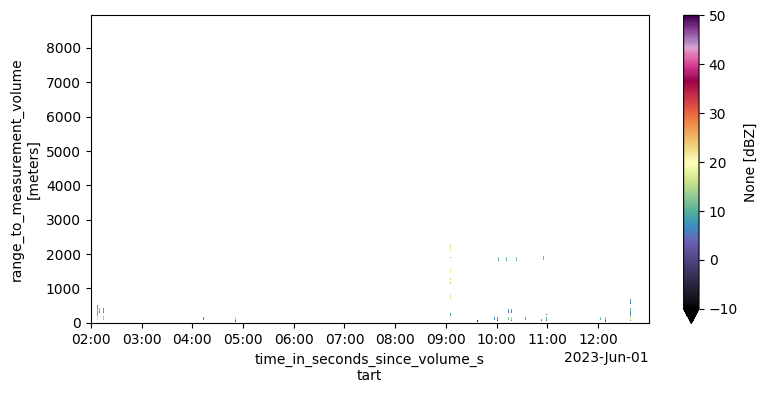

In [10]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)

In [ ]:
# Plotting files with days of the month of August

In [13]:
# list comprehension for files only doing 8 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[439:447]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [14]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230601.020000.nc', 'crocus-neiu-mrrpro-a1-20230601.040000.nc', 'crocus-neiu-mrrpro-a1-20230601.060000.nc', 'crocus-neiu-mrrpro-a1-20230601.090000.nc', 'crocus-neiu-mrrpro-a1-20230601.100000.nc', 'crocus-neiu-mrrpro-a1-20230601.120000.nc', 'crocus-neiu-mrrpro-a1-20230601.140000.nc', 'crocus-neiu-mrrpro-a1-20230601.160000.nc', 'crocus-neiu-mrrpro-a1-20230601.190000.nc', 'crocus-neiu-mrrpro-a1-20230601.210000.nc', 'crocus-neiu-mrrpro-a1-20230601.230000.nc', 'crocus-neiu-mrrpro-a1-20230602.020000.nc', 'crocus-neiu-mrrpro-a1-20230602.040000.nc', 'crocus-neiu-mrrpro-a1-20230602.060000.nc', 'crocus-neiu-mrrpro-a1-20230602.090000.nc', 'crocus-neiu-mrrpro-a1-20230602.100000.nc', 'crocus-neiu-mrrpro-a1-20230602.120000.nc', 'crocus-neiu-mrrpro-a1-20230602.140000.nc', 'crocus-neiu-mrrpro-a1-20230602.180000.nc', 'crocus-neiu-mrrpro-a1-20230602.190000.nc', 'crocus-neiu-mrrpro-a1-20230602.230000.nc', 'crocus-neiu-mrrpro-a1-20230603.020000.nc', 'crocus-neiu-mrrp

In [15]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2520, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-01T03:00:00.009131008 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

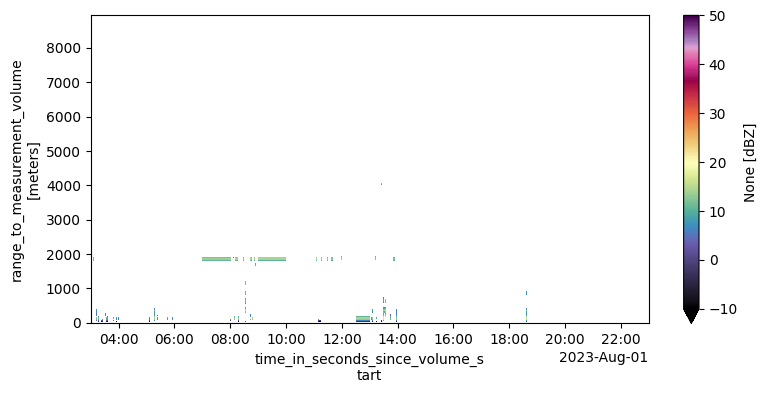

In [17]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 1.png', dpi=300, bbox_inches='tight')

In [19]:
# list comprehension for files only doing 6 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[447:453]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [20]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 1800, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-02T05:00:00.009128960 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

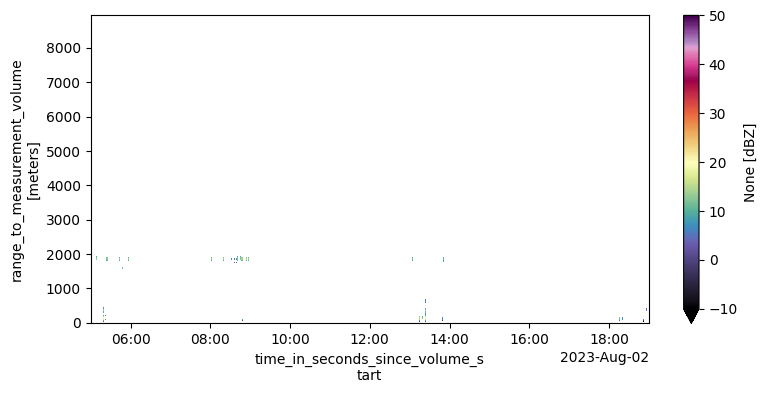

In [21]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 2.png', dpi=300, bbox_inches='tight')

In [23]:
# list comprehension for files only doing 10 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[453:463]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [24]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2880, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-03T03:00:00.009129984 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

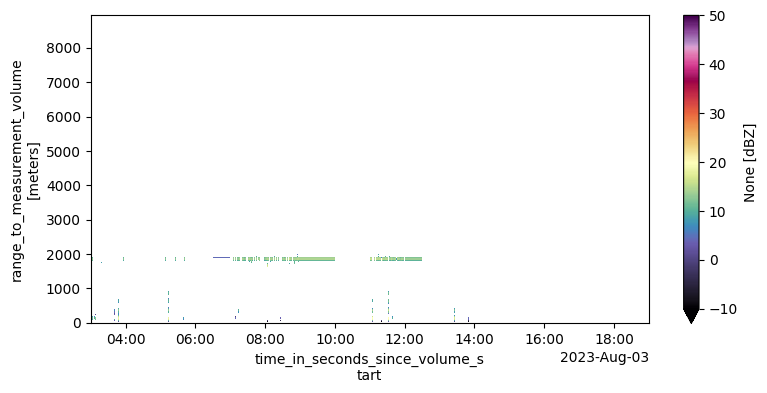

In [25]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 3.png', dpi=300, bbox_inches='tight')

In [29]:
# list comprehension for files only doing 5 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[463:468]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [30]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 1440, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-04T05:00:00.009152 ... 2023-08-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

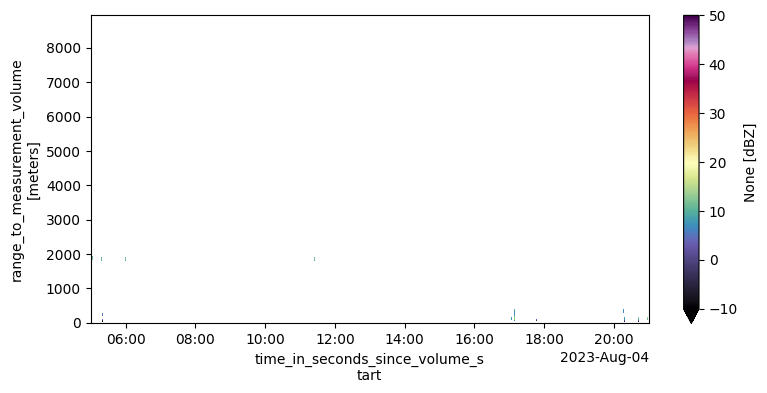

In [31]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 4.png', dpi=300, bbox_inches='tight')

In [32]:
# list comprehension for files only doing 9 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[468:477]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [33]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2160, range: 256)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan, 5.91964922, ...,        nan,        nan,
               nan],
       [       nan,        nan, 0.32225169, ...,        nan,        nan,
               nan],
       [       nan,        nan, 1.53367927, ...,        nan,        nan,
               nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-05T05:00:00.009129984 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

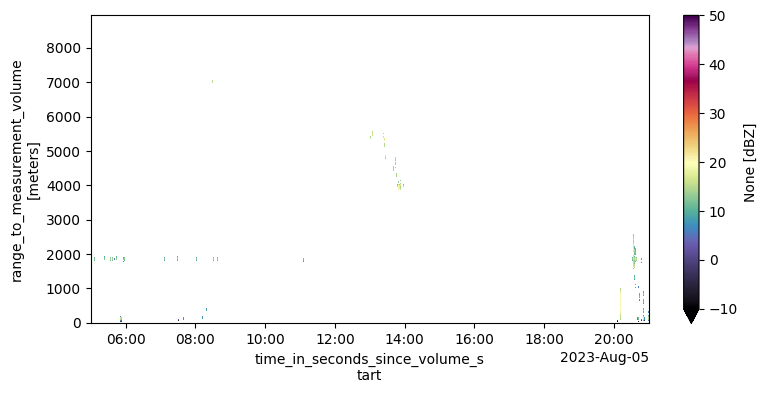

In [34]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 5.png', dpi=300, bbox_inches='tight')

In [35]:
# list comprehension for files only doing 8 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[477:485]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [36]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2160, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-06T01:00:00.009128192 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

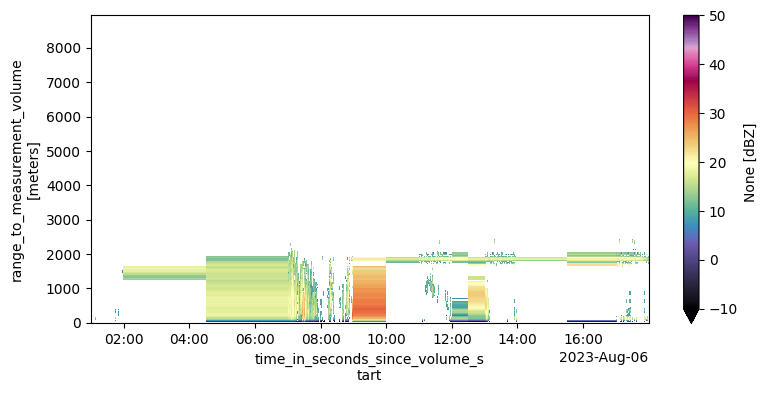

In [37]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 6.png', dpi=300, bbox_inches='tight')

In [41]:
# list comprehension for files only doing 9 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[485:494]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [42]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2520, range: 256)>
array([[        nan, -7.38897972,  0.89643459, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-07T01:00:00.009124096 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

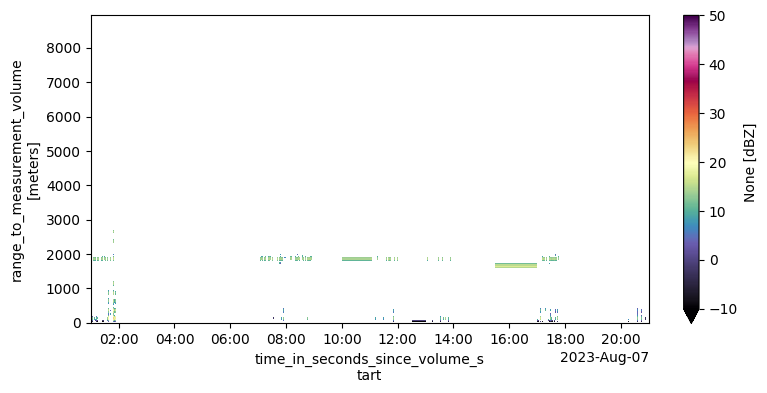

In [43]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 7.png', dpi=300, bbox_inches='tight')

In [44]:
# list comprehension for files only doing 9 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[494:503]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [45]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2880, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-08T01:00:00.009146880 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

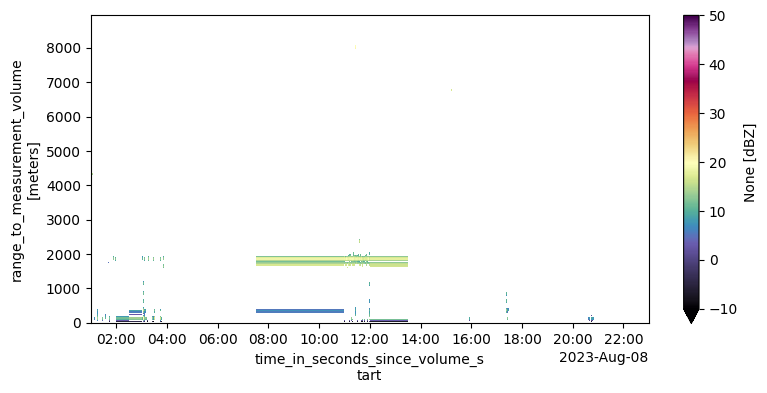

In [46]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 8.png', dpi=300, bbox_inches='tight')

In [47]:
# list comprehension for files only doing 8 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[503:511]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [48]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 1800, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-09T01:00:00.009115904 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

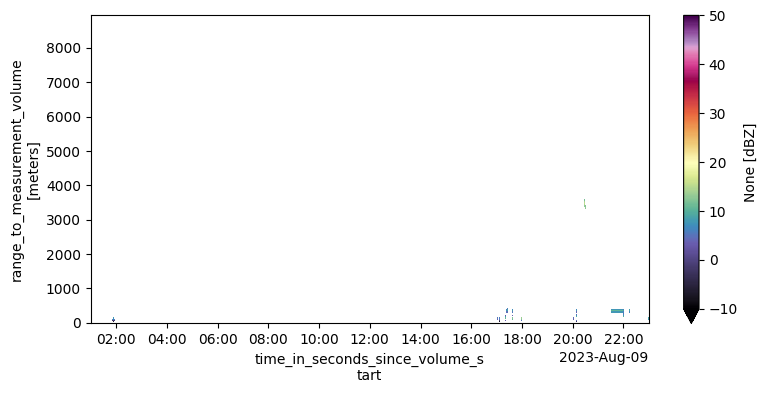

In [49]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 9.png', dpi=300, bbox_inches='tight')

In [51]:
# list comprehension for files only doing 9 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[511:520]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [52]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2520, range: 256)>
array([[        nan, -7.48890246, -0.41455422, ...,         nan,
                nan,         nan],
       [        nan,         nan, -0.5602186 , ...,         nan,
                nan,         nan],
       [        nan, -6.40813531,  0.38452781, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-10T00:00:00.009120 ... 2023-08-1...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

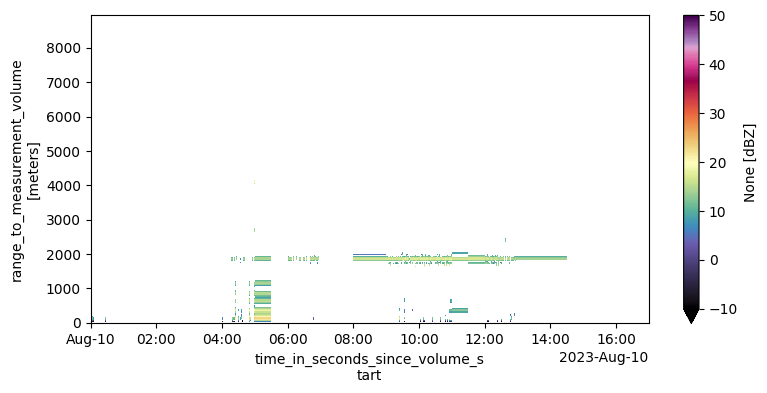

In [53]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 10.png', dpi=300, bbox_inches='tight')

In [58]:
# list comprehension for files only doing 8 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[520:528]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [59]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2160, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-11T00:00:00.009126912 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

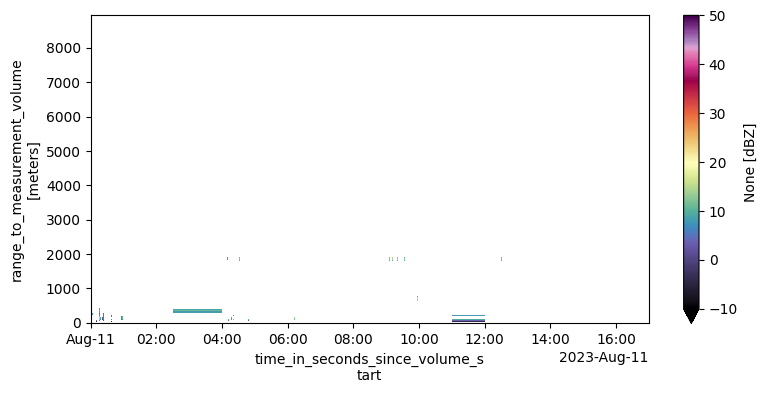

In [60]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 11.png', dpi=300, bbox_inches='tight')

In [61]:
# list comprehension for files only doing 6 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[528:534]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [62]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 1800, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-12T06:00:00.009131008 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

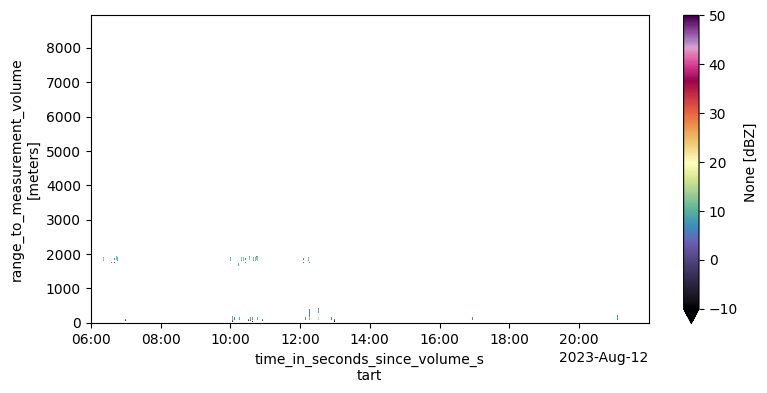

In [63]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 12.png', dpi=300, bbox_inches='tight')

In [64]:
# list comprehension for files only doing 7 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[534:541]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [65]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 1800, range: 256)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan, -8.5759821 ,  0.03358392, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-13T04:00:00.009123072 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

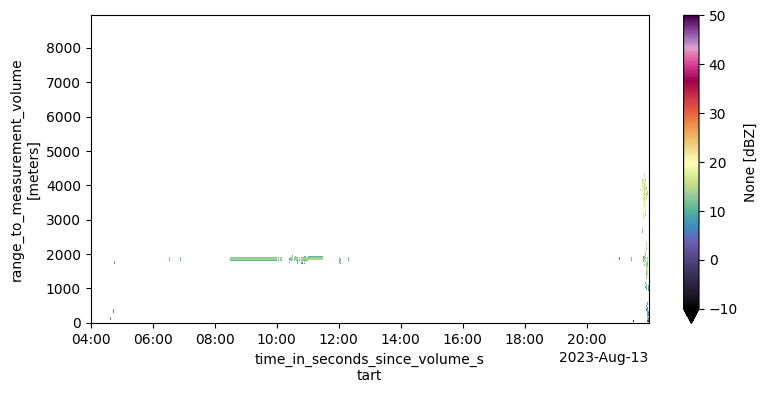

In [66]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 13.png', dpi=300, bbox_inches='tight')

In [67]:
# list comprehension for files only doing 7 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[541:548]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [68]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2520, range: 256)>
array([[        nan,         nan,  9.16905038, ...,         nan,
                nan,         nan],
       [        nan, -1.34025375,  7.02375748, ...,         nan,
                nan,         nan],
       [        nan,         nan,  9.76406377, ...,         nan,
                nan,         nan],
       ...,
       [        nan, 14.91812033, 23.1622142 , ...,         nan,
                nan,         nan],
       [        nan, 14.2959278 , 23.18768307, ...,         nan,
                nan,         nan],
       [        nan, 14.54844275, 23.57833345, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-14T02:00:00.009133056 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

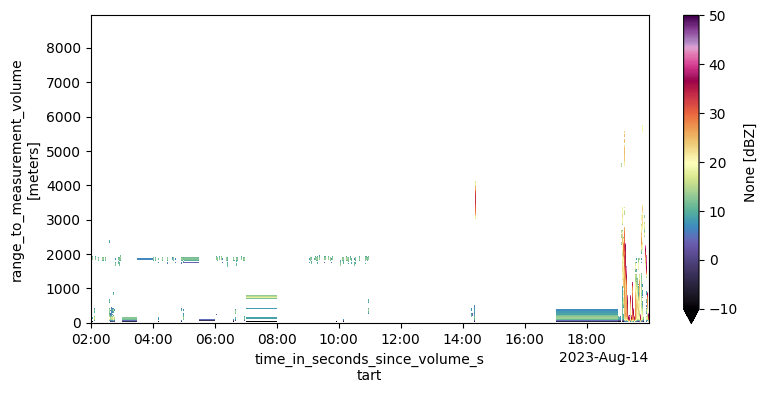

In [69]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 14.png', dpi=300, bbox_inches='tight')

In [73]:
# list comprehension for files only doing 9 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[548:557]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [74]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2520, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-15T02:00:00.009150976 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

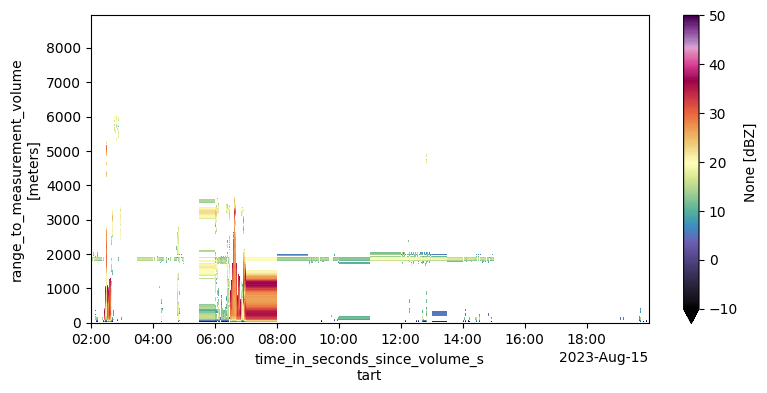

In [75]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 15.png', dpi=300, bbox_inches='tight')

In [76]:
# list comprehension for files only doing 8 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[557:565]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [77]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 1800, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-16T06:00:00.009128192 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

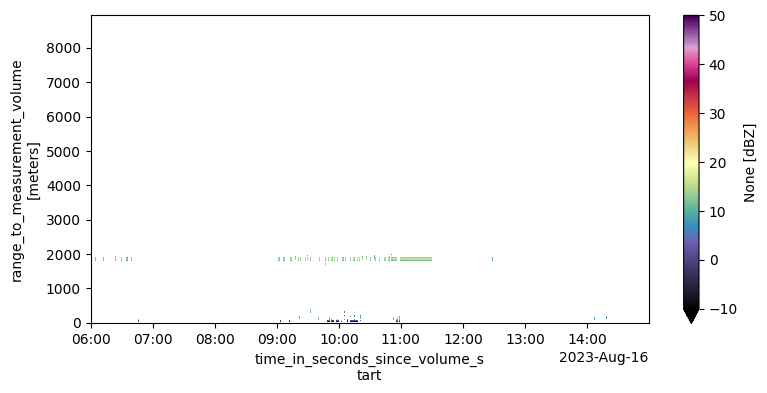

In [78]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 16.png', dpi=300, bbox_inches='tight')

In [79]:
# list comprehension for files only doing 5 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[565:570]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [80]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 1440, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-17T06:00:00.009126912 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

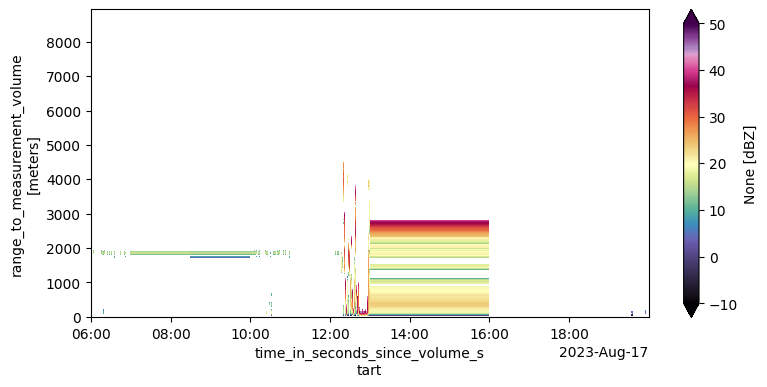

In [81]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 17.png', dpi=300, bbox_inches='tight')

In [84]:
# list comprehension for files only doing 7 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[570:577]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [85]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2160, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-18T00:00:00.009128192 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

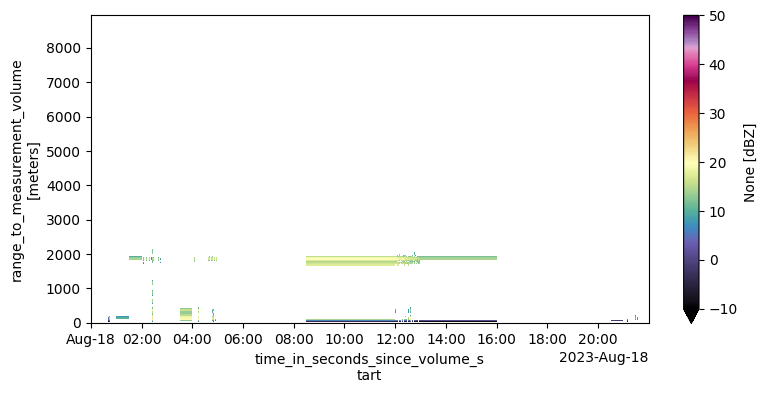

In [86]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 18.png', dpi=300, bbox_inches='tight')

In [87]:
# list comprehension for files only doing 6 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[577:583]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [88]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2160, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-19T00:00:00.009139968 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

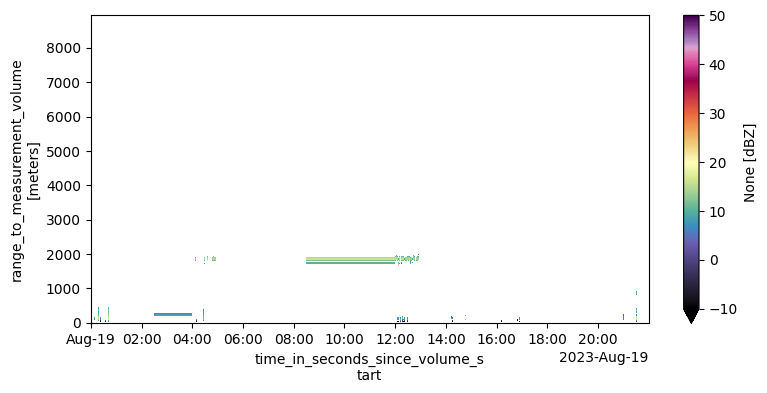

In [89]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 19.png', dpi=300, bbox_inches='tight')

In [93]:
# list comprehension for files only doing 9 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[583:592]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [94]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2160, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-20T01:00:00.009138176 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

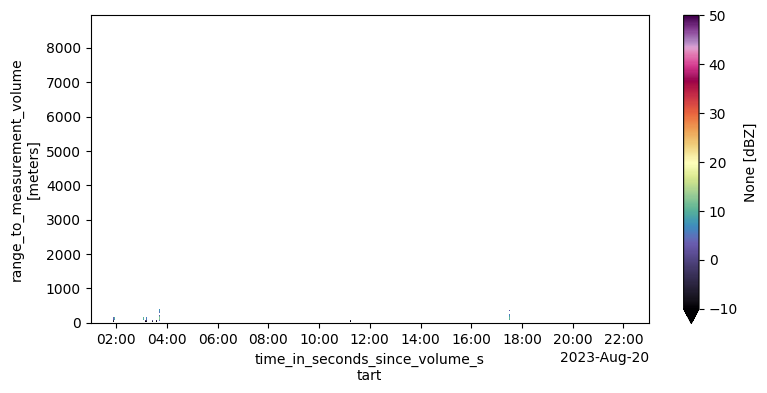

In [95]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 20.png', dpi=300, bbox_inches='tight')

In [96]:
# list comprehension for files only doing 5 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[592:597]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [97]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 1080, range: 256)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan, -1.73039556, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-21T01:00:00.009129984 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

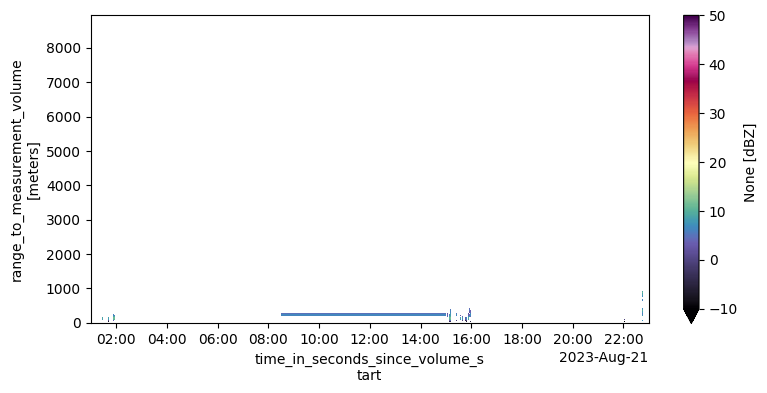

In [98]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 21.png', dpi=300, bbox_inches='tight')

In [99]:
# list comprehension for files only doing 10 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[597:607]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [100]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 3240, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-22T01:00:00.009152 ... 2023-08-2...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

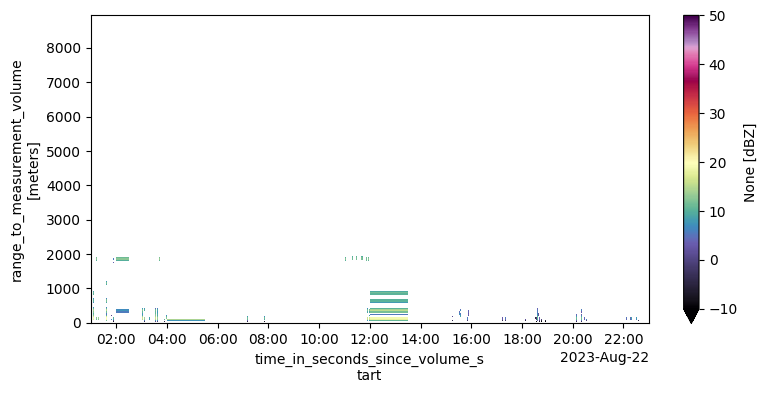

In [101]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 22.png', dpi=300, bbox_inches='tight')

In [104]:
# list comprehension for files only doing 6 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[607:613]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [105]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 1800, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-23T03:00:00.009133056 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

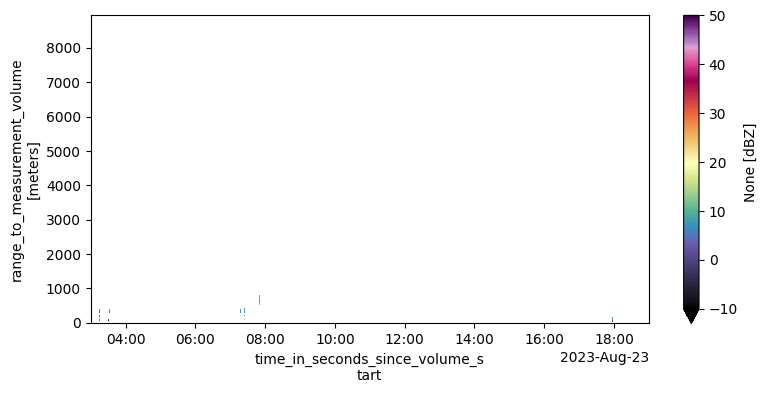

In [106]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 23.png', dpi=300, bbox_inches='tight')

In [107]:
# list comprehension for files only doing 8 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[613:621]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [108]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2520, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-24T03:00:00.009121792 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

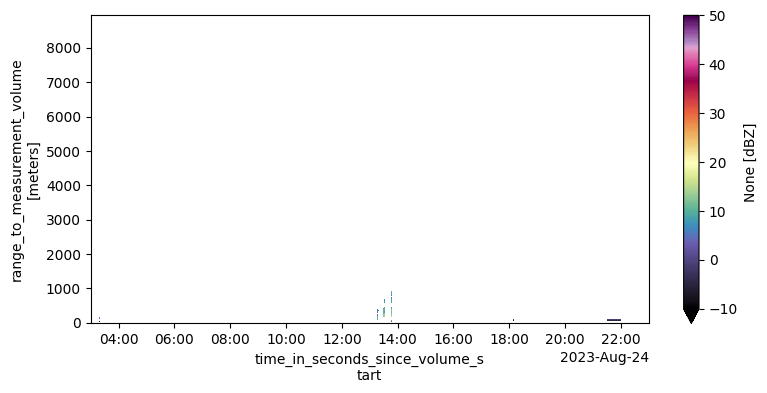

In [109]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 24.png', dpi=300, bbox_inches='tight')

In [113]:
# list comprehension for files only doing 2 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[621:623]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [114]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 720, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-25T15:00:00.009142016 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

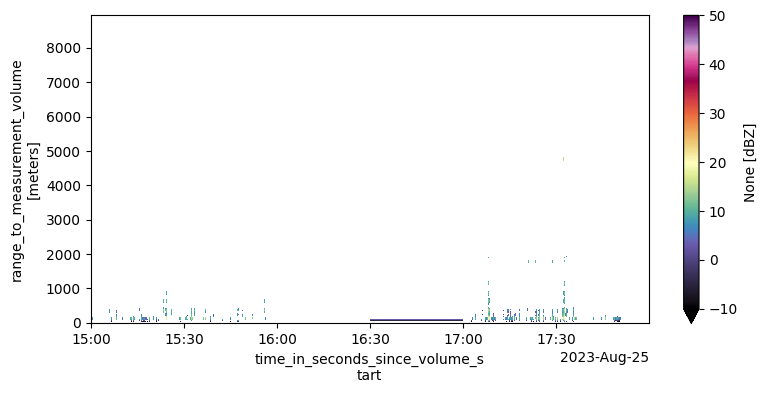

In [115]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 25.png', dpi=300, bbox_inches='tight')

In [116]:
# list comprehension for files only doing 8 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[623:631]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [117]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2520, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-26T03:00:00.009124096 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

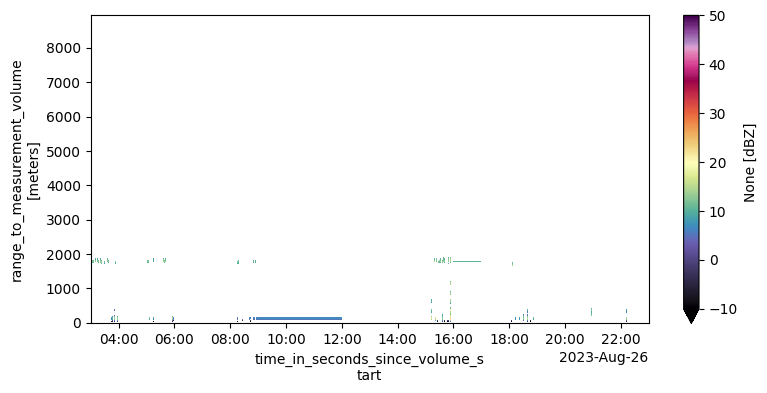

In [118]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 26.png', dpi=300, bbox_inches='tight')

In [119]:
# list comprehension for files only doing 6 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[631:637]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [120]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 1800, range: 256)>
array([[        nan,  4.45044375, 12.4333926 , ...,         nan,
                nan,         nan],
       [        nan,  3.03012174, 10.84335545, ...,         nan,
                nan,         nan],
       [        nan, -2.3099073 ,  5.8040974 , ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-27T03:00:00.009121792 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

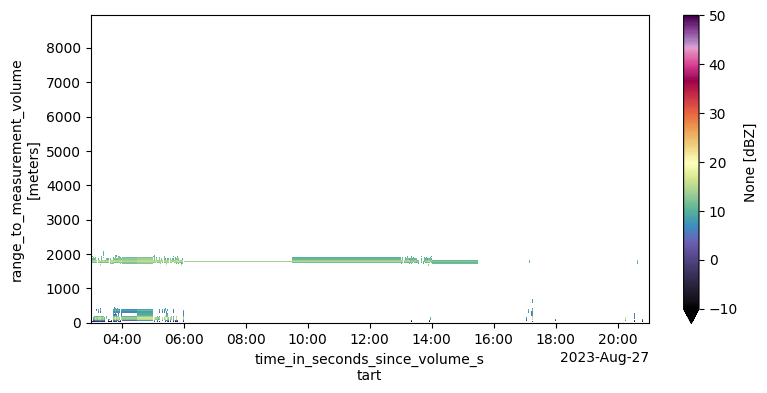

In [121]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 27.png', dpi=300, bbox_inches='tight')

In [130]:
# list comprehension for files only doing 4 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[637:641]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [131]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 1080, range: 256)>
array([[        nan, -8.79901791,  1.40531768, ...,         nan,
                nan,         nan],
       [        nan, -6.0171613 ,  1.45393932, ...,         nan,
                nan,         nan],
       [        nan,         nan,  6.27070938, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-28T05:00:00.009129984 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

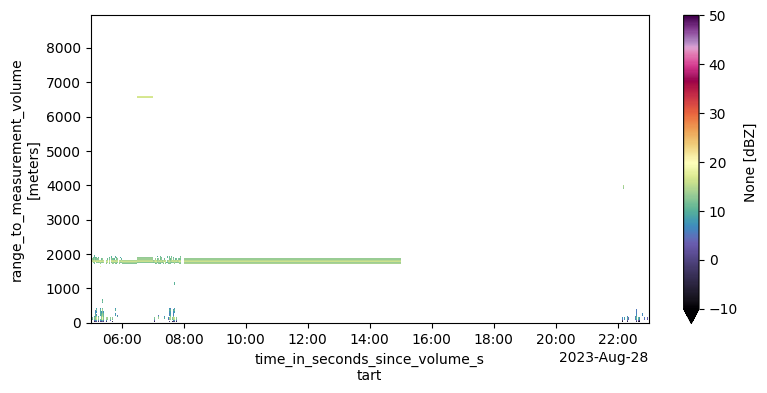

In [132]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 28.png', dpi=300, bbox_inches='tight')

In [133]:
# list comprehension for files only doing 4 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[641:645]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [134]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 720, range: 256)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan, -6.47877456,  1.11827642, ...,         nan,
                nan,         nan],
       [        nan, -2.64312881,  5.46992743, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan, -0.13140018, ...,         nan,
                nan,         nan],
       [        nan, -4.99492294,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-29T13:00:00.009136896 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

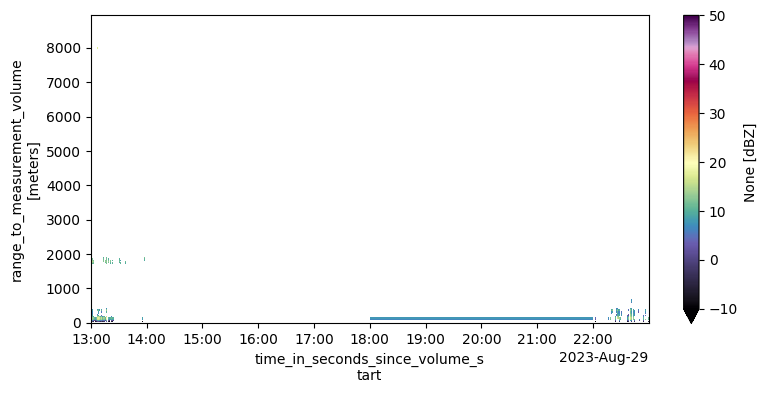

In [135]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 29.png', dpi=300, bbox_inches='tight')

In [136]:
# list comprehension for files only doing 7 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[645:652]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [137]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2160, range: 256)>
array([[        nan, -7.78632302,  2.37431633, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,  5.44876744, 14.58912098, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-30T09:00:00.009125888 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

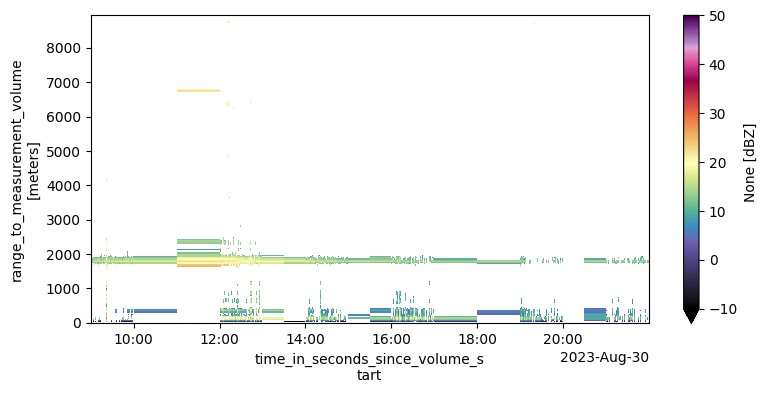

In [138]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 30.png', dpi=300, bbox_inches='tight')

In [139]:
# list comprehension for files only doing 4 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[652:656]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [140]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 1080, range: 256)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan, -1.30475165,  5.74751417, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,  3.72673736, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-08-31T02:00:00.009135872 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

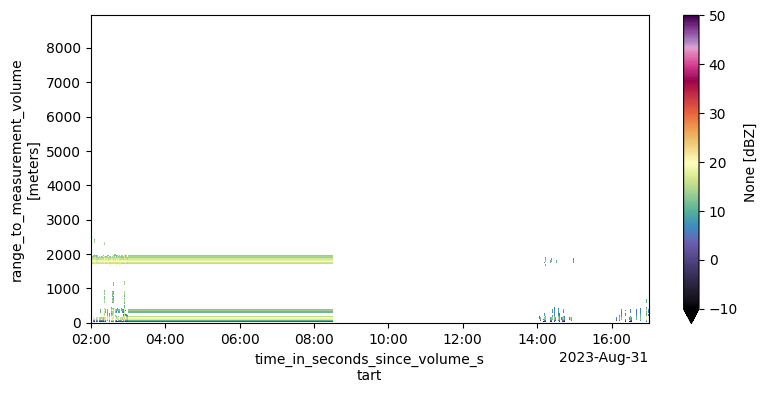

In [141]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('August 31.png', dpi=300, bbox_inches='tight')

In [129]:
ds = cat.datasets[652:656]
ds

[crocus-neiu-mrrpro-a1-20230831.020000.nc,
 crocus-neiu-mrrpro-a1-20230831.100000.nc,
 crocus-neiu-mrrpro-a1-20230831.140000.nc,
 crocus-neiu-mrrpro-a1-20230831.160000.nc]